In [187]:
## imports
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from functools import reduce
import seaborn as sns

# statistical tests
from scipy import stats

#feature engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# modeling
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

In [188]:
## merging datasets

os.chdir("/Users/justin/Desktop/xvid_project/data/")
final_df = pd.DataFrame()
random = np.random.randint(1,1000,200)
for page in random:
    csv_file = "Page_"+str(page)+".csv"
    current_file = pd.read_csv(csv_file, sep=",")
    final_df = pd.concat([final_df,current_file]).reset_index(drop=True)

final_df.head(10)


,Url,Title,Time,Author,Views,Tags,Thumbs_up,Thumbs_down,Comment_N
0,https://www.xvideos.com/video52736963/teen_che...,TEEN CHEERLEADER WEARING YELLOW SHORTS MAKE LO...,7.0,Loveandfire,10106440,"Loveandfire,verified profile,teen,pussy,ass,cr...",26700,12800,235.0
1,https://www.xvideos.com/video54111365/pregnant...,Pregnant cousin asks for help,10.0,Justsomehuman,2101149,"Justsomehuman,verified profile,cumshot,cum,fac...",4800,2000,33.0
2,https://www.xvideos.com/video52353317/sister-i...,Sister-in-law caught masturbating! Samantha Flair,21.0,Samantha Flair,3952844,"Samantha Flair,verified profile,cumshot,teen,a...",6400,3000,77.0
3,https://www.xvideos.com/video54083661/se_pone_...,Se pone tan Cachonda viendo a su Amiga follar ...,37.0,Brunoproduciones,7363403,"Brunoproduciones,teen,european,creampie,blowjo...",12900,7700,66.0
4,https://www.xvideos.com/video53912733/susan_s_...,Susan's First Threesome,12.0,Private Society,1427129,"Private Society,facial,blonde,amateur,redhead,...",3000,491,28.0
5,https://www.xvideos.com/video22692469/watch_yo...,Watch you hot wife getting pounded by an alpha...,15.0,Curious Porn Pass,1012906,"Curious Porn Pass,Ginger Lea,black,interracial...",769,366,7.0
6,https://www.xvideos.com/video1197574/vca_-_the...,VCA - The Scandal Of Nicky Eros - scene 6,12.0,More Free Porn,1433274,"More Free Porn,Asia Carrera,",1500,390,8.0
7,https://www.xvideos.com/video52857455/teen_cre...,Teen Creampie Compilation Begging cum inside p...,8.0,Oliver Strelly,1025304,"Oliver Strelly,cum,pussy,creampie,teens,inside...",1300,469,8.0
8,https://www.xvideos.com/video53991317/zoey_rey...,zoey reyes dominican freak taking that trey sc...,6.0,The Habib Show,288614,"The Habib Show,Zoey Reyes,black,cock,natural,a...",493,170,2.0
9,https://www.xvideos.com/video54083677/mature_b...,Mature blonde Mira fucks and sucks monster BBC...,16.0,Hush,306807,"Hush,facial,blonde,interracial,milf,blowjob,do...",520,180,10.0


In [362]:
test_title = final_df.loc[0,["Title"]][0]
test_tags = final_df.loc[0,["Tags"]][0]
test_title = set(test_title.lower().split())
test_title

{'cheerleader',
 'dorm',
 'his',
 'love',
 'make',
 'roommate',
 'shorts',
 'teen',
 'wearing',
 'with',
 'yellow'}

In [365]:
test_tags

'Loveandfire,verified profile,teen,pussy,ass,creampie,doggystyle,amateur,young,cheerleader,couple,cu,romantic,novinha,shortinho,socado,cum-inside,high-school,short-shorts,'

In [ ]:
test

In [3]:
final_df.shape

(2747, 9)

In [4]:

final_df = final_df.fillna(0)
final_df = final_df.dropna()
final_df = final_df.drop_duplicates()
final_df.shape

(2744, 9)

In [5]:
# data descriptions
print(final_df.dtypes)
print(final_df.shape)

Url             object
Title           object
Time           float64
Author          object
Views            int64
Tags            object
Thumbs_up        int64
Thumbs_down      int64
Comment_N      float64
dtype: object
(2744, 9)


In [6]:
final_df = final_df[(final_df["Thumbs_up"]!=0) & (final_df["Thumbs_down"]!=0)]
final_df['Thumbs_Ratio'] = final_df['Thumbs_up']/final_df['Thumbs_down']
final_df.head(2)
final_df.shape

(2740, 10)

In [7]:
# Visualization and explore
xv  = final_df

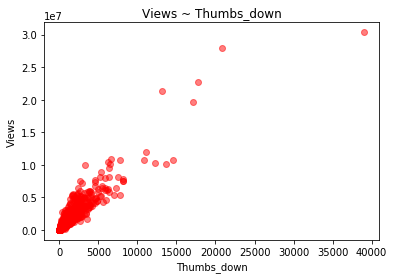

In [9]:

plt.scatter(xv['Thumbs_down'],xv['Views'],color='red',alpha=0.5)
plt.title('Views ~ Thumbs_down')
plt.xlabel('Thumbs_down')
plt.ylabel('Views')
plt.show()


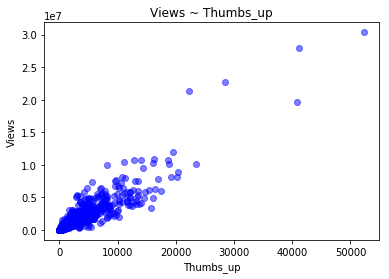

In [10]:
plt.scatter(xv['Thumbs_up'],xv['Views'],color='blue',alpha=0.5)
plt.title('Views ~ Thumbs_up')
plt.xlabel('Thumbs_up')
plt.ylabel('Views')
plt.show()



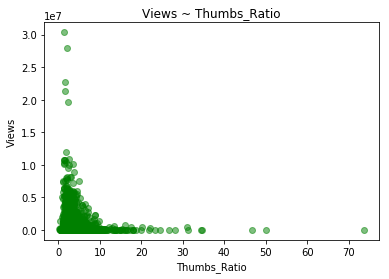

In [10]:
plt.scatter(xv['Thumbs_Ratio'],xv['Views'],color='green',alpha=0.5)
plt.title('Views ~ Thumbs_Ratio')
plt.xlabel('Thumbs_Ratio')
plt.ylabel('Views')
plt.show()



In [15]:
# xv[xv['Thumbs_Ratio']>10]['Url']
# 10 is the baseline; many good videos don't have that much views
# the one's with lots of views, have a ratio between 0-10
xv[xv['Views']>1.5*10**7]['Url']

9       https://www.xvideos.com/video27061091/17629531...
706     https://www.xvideos.com/video33984601/asian_pr...
1074    https://www.xvideos.com/video56005023/seductiv...
1643    https://www.xvideos.com/video26740667/brazzers...
2658    https://www.xvideos.com/video57151431/cute_jui...
Name: Url, dtype: object

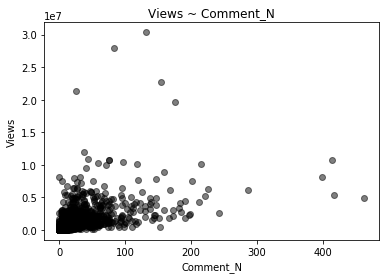

In [11]:
plt.scatter(xv['Comment_N'],xv['Views'],color='black',alpha=0.5)
plt.title('Views ~ Comment_N')
plt.xlabel('Comment_N')
plt.ylabel('Views')
plt.show()



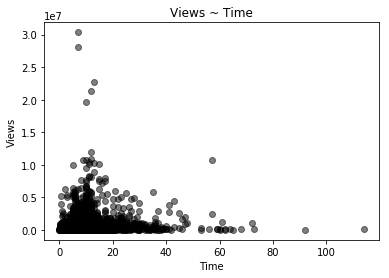

In [12]:
plt.scatter(xv['Time'],xv['Views'],color='black',alpha=0.5)
plt.title('Views ~ Time')
plt.xlabel('Time')
plt.ylabel('Views')
plt.show()



In [13]:
xv['log_Views'] = xv['Views'].apply(lambda x:math.log(x))

[Text(0, 0.5, 'Log Views'),
 Text(0.5, 0, 'Time'),
 Text(0.5, 1.0, 'Log Views to Time')]

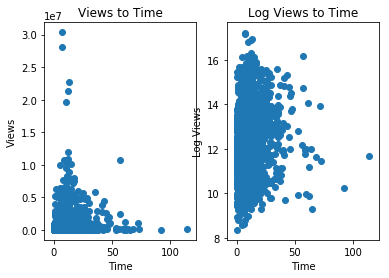

In [27]:
fig, (ax1, ax2)  = plt.subplots(1, 2, sharex=True)

ax1.scatter(xv['Time'],xv['Views'])
ax1.set(title = "Views to Time",xlabel = "Time",ylabel ="Views")

ax2.scatter(xv['Time'],xv['log_Views'])
ax2.set(title = "Log Views to Time",xlabel = "Time",ylabel = "Log Views")

[Text(0, 0.5, 'Log Views'),
 Text(0.5, 0, 'Thumbs_up'),
 Text(0.5, 1.0, 'Log Views to Thumbs_up')]

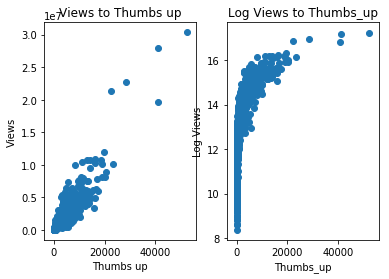

In [15]:
fig, (ax1, ax2)  = plt.subplots(1, 2, sharex=True)

ax1.scatter(xv['Thumbs_up'],xv['Views'])
ax1.set(title = "Views to Thumbs up",xlabel = "Thumbs up",ylabel ="Views")

ax2.scatter(xv['Thumbs_up'],xv['log_Views'])
ax2.set(title = "Log Views to Thumbs_up",xlabel = "Thumbs_up",ylabel = "Log Views")

[Text(0, 0.5, 'Log Views'),
 Text(0.5, 0, 'Thumbs_down'),
 Text(0.5, 1.0, 'Log Views to Thumbs_down')]

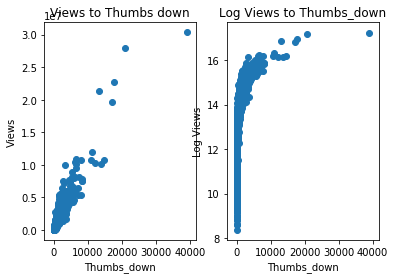

In [16]:
fig, (ax1, ax2)  = plt.subplots(1, 2, sharex=True)

ax1.scatter(xv['Thumbs_down'],xv['Views'])
ax1.set(title = "Views to Thumbs down",xlabel = "Thumbs_down",ylabel ="Views")

ax2.scatter(xv['Thumbs_down'],xv['log_Views'])
ax2.set(title = "Log Views to Thumbs_down",xlabel = "Thumbs_down",ylabel = "Log Views")

[Text(0, 0.5, 'Log Views'),
 Text(0.5, 0, 'Thumbs_Ratio'),
 Text(0.5, 1.0, 'Log Views to Thumbs_Ratio')]

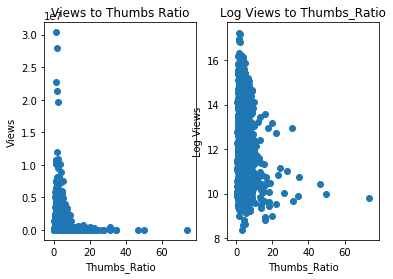

In [17]:
fig, (ax1, ax2)  = plt.subplots(1, 2, sharex=True)

ax1.scatter(xv['Thumbs_Ratio'],xv['Views'])
ax1.set(title = "Views to Thumbs Ratio",xlabel = "Thumbs_Ratio",ylabel ="Views")

ax2.scatter(xv['Thumbs_Ratio'],xv['log_Views'])
ax2.set(title = "Log Views to Thumbs_Ratio",xlabel = "Thumbs_Ratio",ylabel = "Log Views")

[Text(0, 0.5, 'Log Views'),
 Text(0.5, 0, 'Comment_N'),
 Text(0.5, 1.0, 'Log Views to number of Comment')]

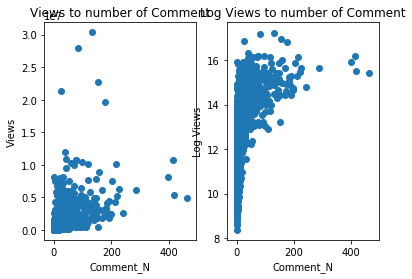

In [18]:
fig, (ax1, ax2)  = plt.subplots(1, 2, sharex=True)

ax1.scatter(xv['Comment_N'],xv['Views'])
ax1.set(title = "Views to number of Comment",xlabel = "Comment_N",ylabel ="Views")

ax2.scatter(xv['Comment_N'],xv['log_Views'])
ax2.set(title = "Log Views to number of Comment",xlabel = "Comment_N",ylabel ="Log Views")

In [19]:
xv.head(10)

,Url,Title,Time,Author,Views,Tags,Thumbs_up,Thumbs_down,Comment_N,Thumbs_Ratio,log_Views
0,https://www.xvideos.com/video52056245/17629531...,La Mamá de mi amigo se escapa de noche para ju...,6.0,Gbadboylw,2234906,"Gbadboylw,blowjob,mamada,pene,verga,",4500,967,95.0,4.653568,14.619710
1,https://www.xvideos.com/video52286187/17629531...,Her melons quake and undulate as she's porked ...,10.0,Nacho Vidal Official,4181701,"Nacho Vidal Official,Nacho Vidal,milf,blowjob,...",9400,3600,63.0,2.611111,15.246229
2,https://www.xvideos.com/video53951145/17629531...,"""If You Graduate I Will Let You Fuck Me"" Step ...",12.0,Bratty Sis,1865245,"Bratty Sis,Kenzie Madison,cumshot,hardcore,pet...",4600,1000,19.0,4.600000,14.438903
3,https://www.xvideos.com/video57769265/17629531...,i shouldn't have given my step sister a creamp...,10.0,Missarianaxxx,882994,"Missarianaxxx,verified profile,teen,fucking,cr...",2800,799,0.0,3.504380,13.691074
4,https://www.xvideos.com/video57411023/17629531...,Mom pegging,6.0,Jerky Wives,806990,"Jerky Wives,strapon,mom,",1200,693,25.0,1.731602,13.601067
5,https://www.xvideos.com/video57745841/17629531...,"le enseño a mi hermana de 18años , como follar...",10.0,Alejandra X Robert,4227918,"Alejandra X Robert,verified profile,teen,blond...",7900,4300,183.0,1.837209,15.257220
6,https://www.xvideos.com/video58435999/17629531...,The Big Swap Group Scene by MAZEE,1.5,Amaziing718,169719,"Amaziing718,cumshot,blonde,sexy,interracial,as...",287,54,5.0,5.314815,12.041899
7,https://www.xvideos.com/video44040741/17629531...,Spanish inspector visits a messy massage spa -...,6.0,Fantasy Massage Official,1382942,"Fantasy Massage Official,Bridgette B,Christy L...",2100,817,8.0,2.570379,14.139724
8,https://www.xvideos.com/video37812013/17629531...,ShopLyfter - Corporate Slut Detained and Fucked,10.0,ShopLyfter,2529395,"ShopLyfter,April Reid,cumshot,teen,hardcore,do...",3600,1800,11.0,2.000000,14.743491
9,https://www.xvideos.com/video27061091/17629531...,Petite Teen Meets Up With Guy From The Internet,13.0,Hookup Hotshot,22668264,"Hookup Hotshot,Lilly Ford,sex,teen,hardcore,pe...",28500,17700,154.0,1.610169,16.936476


In [20]:
# Questions

# Q1: What is the time distribution for adult videos? (e.g. time frequency) // histogram
# Q2: What are the most used tags?
# Q3: Calculate the tags mean views (0/1)
# Q4: minmax scale or log scale the continuous variables and draw plots again
# Q5: Which author has the most views (on average) ? 



## Data visualization
# https://www.drawingfromdata.com/setting-figure-size-using-seaborn-and-matplotlib



Text(0, 0.5, 'Count')

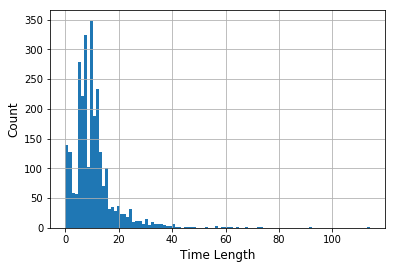

In [21]:
# Q1: What is the time distribution for adult videos? (e.g. time frequency) // histogram
# using seaborn


xv['Time'].hist(bins=100,grid=True)
plt.xlabel('Time Length', fontsize = 12)
plt.ylabel('Count', fontsize = 12)



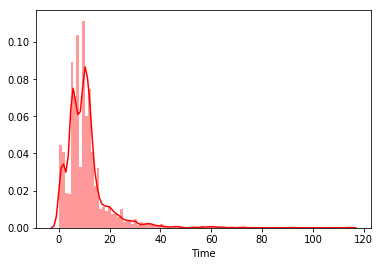

In [22]:
sns.distplot(xv['Time'],color = "red", bins= 100)

In [21]:
# Q5: Which author has the most views (on average) ?
print("Total Number of creators", len(xv['Author']))
print("Number of unique creators", len(xv['Author'].unique()))

# This means on average one creator created 2+ vids for the first 100 pages of Xvideo

Total Number of creators 2740
Number of unique creators 1399


In [22]:
# Q5: Which author has the most views (on average) ?
# group by author
xv_author = xv.groupby("Author")['Views'].mean().reset_index()
xv_author.sort_values("Views",ascending=False).head(30)


,Author,Views
175,Brazzers,2.802377e+07
1071,S Cute Official,2.128936e+07
813,Mommy Got Boobs,1.970500e+07
1090,Sarika Vikki,1.710755e+07
502,Hookup Hotshot,1.167802e+07
560,Jav HD,1.090099e+07
535,Indian XXX Reality,1.071817e+07
957,Petite Horny,1.007663e+07
1155,Sneaky Sex,9.578818e+06
1382,XxCrisantoxX,9.193564e+06


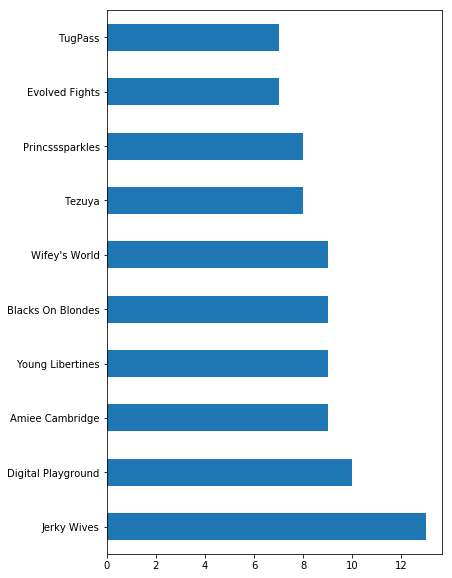

In [23]:
## Which author created the most videos?

xv['Author'].value_counts().sort_values(ascending=False).head(10).plot(kind="barh",figsize=(6,10))


In [16]:
# Q2: What are the most used tags?

# Turn tag to list
def TurnToList(tags):
    tags =  tags[:len(tags)-1]
    alltags2=tags.replace("'","")
    alltags2=alltags2.replace("[","")
    alltags2=alltags2.replace("]","")
    alltags2=alltags2.split(",")
    alltags3=list(map(lambda x:x.strip(),alltags2))

    return alltags3


xv["Tags"] = xv["Tags"].apply(lambda x: TurnToList(x))

In [17]:
def fn(x, y):
	if x is None:
		x=[]
	elif y is None:
		y=[]
	else:
		return x+y

# got sparse matrix
def add_tags(df):
    existing_tags=reduce(fn,df["Tags"] )
    existing_tags_set = set(existing_tags)
    for ex in existing_tags_set:
        df[ex] = df['Tags'].apply(lambda x: 1 if ex in x else 0)
    return existing_tags, xv

existing_tags , xv = add_tags(xv)

In [29]:
xv.shape

(2740, 9559)

In [37]:
# xv.head(5)
# sample_xv = xv.sample(frac=0.2)
# sample_xv.head(5)
# sample_xv.shape

# sample_xv.iloc[: , 0:5].to_csv("/Users/justin/Desktop/sample_xv.csv")


(548, 9559)

In [24]:
print(f"There consists of {len(set(existing_tags))} unique tags in all videos.")  
print(existing_tags[:10])

There consists of 9548 unique tags in all videos.
['Gbadboylw', 'blowjob', 'mamada', 'pene', 'verga', 'Nacho Vidal Official', 'Nacho Vidal', 'milf', 'blowjob', 'big-ass']


In [32]:
## What is the frequency of the existing tags
tag_dict = {}
for items in existing_tags:
    if items in tag_dict.keys():
        tag_dict[items] +=1
    else:
        tag_dict[items] =1

tag_dict = sorted(tag_dict.items(), key = lambda x:x[1] , reverse=True)

tag_dict = pd.DataFrame(tag_dict)

tag_dict.columns = ['Tag','Frequency']
tag_dict[tag_dict['Frequency']>100].shape ## 79 tags have 100 mentions in a total of 2744 videos


(9, 2)

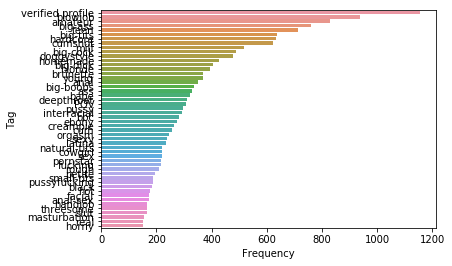

In [31]:
## barplot
# frequency of tags used in videos
sns.barplot(x=tag_dict['Frequency'].head(50), y=tag_dict["Tag"].head(50), orient = 'h')

In [32]:
# Q3: Calculate the tags mean views (0/1)

tag_200 = tag_dict[:201]

contain = []
not_contain = []
pvalue = []
for index in range(0,201):
    current_tag = tag_dict['Tag'][index]
    
    ## perform t- test
    not_contain_views = xv[xv[current_tag]==0]['Views']
    contain_views = xv[xv[current_tag]==1]['Views']
    p_value = stats.ttest_ind(contain_views,not_contain_views).pvalue
    pvalue.append(p_value)
    
    # group by Views and calculate mean
    tag_stat = xv.groupby(current_tag)['Views'].mean()
    not_contain.append(round(tag_stat[0]))
    contain.append(round(tag_stat[1]))

tag_200['Contain View mean'] = contain
tag_200['Not Contain View mean'] = not_contain
tag_200['P-Value'] = pvalue

tag_200.head(5)



/Users/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

,Tag,Frequency,Contain View mean,Not Contain View mean,P-Value
0,verified profile,1156,605558.0,954248.0,5.254967e-08
1,blowjob,939,839651.0,790184.0,4.592770e-01
2,amateur,828,792376.0,813528.0,7.594812e-01
3,big-ass,762,791344.0,813220.0,7.573681e-01
4,teen,713,885347.0,779625.0,1.436491e-01


In [33]:
## what tags have a p- value that < 0.05
tag_significant = tag_200[tag_200['P-Value']<0.05]
tag_significant['Count Diff'] = tag_significant['Contain View mean'] - tag_significant['Not Contain View mean']
tag_significant[tag_significant['Count Diff']>0]

/Users/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Tag,Frequency,Contain View mean,Not Contain View mean,P-Value,Count Diff
6,hardcore,632,988096.0,752883.0,1.772945e-03,235213.0
14,brunette,370,1026395.0,772906.0,6.286020e-03,253489.0
30,latina,234,1105845.0,779244.0,3.986991e-03,326601.0
37,petite,195,1072589.0,786797.0,2.049683e-02,285792.0
54,busty,141,1101207.0,791182.0,3.078594e-02,310025.0
66,missionary,113,1135373.0,793017.0,3.182344e-02,342356.0
101,big,65,1441135.0,791731.0,1.822235e-03,649404.0
103,step-sister,62,1296349.0,795810.0,1.890625e-02,500539.0
108,skinny,59,1406255.0,793952.0,5.057431e-03,612303.0
109,hd,59,1730047.0,786826.0,1.541418e-05,943221.0


In [34]:
tag_significant[tag_significant['Count Diff']<0]

,Tag,Frequency,Contain View mean,Not Contain View mean,P-Value,Count Diff
0,verified profile,1156,605558.0,954248.0,5.254967e-08,-348690.0
7,cumshot,624,691069.0,841364.0,4.688356e-02,-150295.0
22,pussy,297,606425.0,831537.0,2.733011e-02,-225112.0
24,bbc,282,572706.0,834032.0,1.227229e-02,-261326.0
25,ebony,273,607539.0,829224.0,3.629263e-02,-221685.0
28,orgasm,245,534696.0,833889.0,7.088437e-03,-299193.0
34,pornstar,218,489835.0,834563.0,3.253601e-03,-344728.0
35,fucking,215,535585.0,830258.0,1.245484e-02,-294673.0
46,slut,165,534923.0,824579.0,2.979340e-02,-289656.0
47,masturbation,156,536341.0,823484.0,3.590439e-02,-287143.0


In [42]:
# do the same thing with Thumbs_ratio to check for consistency

# Q3: Calculate the tags mean Thumbs_ratio (0/1)

tag_200 = tag_dict[:201]

contain = []
not_contain = []
pvalue = []
for index in range(0,201):
    current_tag = tag_dict['Tag'][index]
    
    ## perform t- test
    not_contain_tr = xv[xv[current_tag]==0]['Thumbs_Ratio']
    contain_tr = xv[xv[current_tag]==1]['Thumbs_Ratio']
    p_value = stats.ttest_ind(contain_tr,not_contain_tr).pvalue
    pvalue.append(p_value)
    
    # group by Views and calculate mean
    tag_stat = xv.groupby(current_tag)['Thumbs_Ratio'].mean()
    not_contain.append(round(tag_stat[0],3))
    contain.append(round(tag_stat[1],3))

tag_200['Contain Thumbs_Ratio mean'] = contain
tag_200['Not Contain Thumbs_Ratio mean'] = not_contain
tag_200['P-Value'] = pvalue

tag_200.head(10)





/Users/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

,Tag,Frequency,Contain Thumbs_Ratio mean,Not Contain Thumbs_Ratio mean,P-Value
0,verified profile,1156,4.230,3.744,0.000092
1,blowjob,939,4.065,3.888,0.173138
2,amateur,828,4.003,3.925,0.560477
3,big-ass,762,3.929,3.957,0.841242
4,teen,713,4.063,3.909,0.271415
5,big-tits,636,4.127,3.895,0.111918
6,hardcore,632,3.807,3.991,0.206649
7,cumshot,624,4.273,3.853,0.004221
8,milf,517,3.666,4.015,0.026826
9,big-cock,489,4.039,3.929,0.492913


In [44]:
tag_significant = tag_200[tag_200['P-Value']<0.05]
tag_significant['Count Diff'] = tag_significant['Contain Thumbs_Ratio mean'] - tag_significant['Not Contain Thumbs_Ratio mean']
tag_significant[tag_significant['Count Diff']>0]


/Users/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Tag,Frequency,Contain Thumbs_Ratio mean,Not Contain Thumbs_Ratio mean,P-Value,Count Diff
0,verified profile,1156,4.230,3.744,9.247691e-05,0.486
7,cumshot,624,4.273,3.853,4.221318e-03,0.420
21,POV,309,4.323,3.901,2.996681e-02,0.422
31,natural-tits,221,4.406,3.909,2.790793e-02,0.497
46,slut,165,4.467,3.916,3.305305e-02,0.551
47,masturbation,156,4.688,3.904,3.141365e-03,0.784
51,tattoo,150,4.589,3.912,1.224357e-02,0.677
80,booty,98,5.614,3.887,1.758965e-07,1.727
88,dildo,87,5.607,3.894,1.015468e-06,1.713
91,solo,84,5.607,3.896,1.577216e-06,1.711


In [45]:
tag_significant[tag_significant['Count Diff']<0]

,Tag,Frequency,Contain Thumbs_Ratio mean,Not Contain Thumbs_Ratio mean,P-Value,Count Diff
8,milf,517,3.666,4.015,0.026826,-0.349
25,ebony,273,3.310,4.020,0.000550,-0.710
39,pussyfucking,186,3.461,3.984,0.032565,-0.523
40,black,184,3.263,3.998,0.002781,-0.735
43,anal-sex,173,3.306,3.992,0.006659,-0.686
44,handjob,167,3.473,3.980,0.048902,-0.507
48,real,152,3.378,3.982,0.024672,-0.604
55,reality,141,3.417,3.978,0.043989,-0.561
100,massage,67,2.856,3.976,0.004893,-1.120
135,voyeur,43,2.959,3.965,0.042301,-1.006


In [36]:
## Clustering using all variables (not including Author)


#agglomerative hierarchical clustering
xv_cluster = xv.drop(['Url','Title','Author','Tags','log_Views'],axis=1)


# min max scale for Time, Views, Thumbs_up, Thumbs_down, Comment_N, Thumbs_Ratio
xv_scale = xv[['Time','Views','Thumbs_up','Thumbs_down','Comment_N','Thumbs_Ratio']]
MMscaler = MinMaxScaler()
xv_scale=MMscaler.fit_transform(xv_scale)
xv_scale = pd.DataFrame(xv_scale)
xv_scale.columns = ['Time','Views','Thumbs_up','Thumbs_down','Comment_N','Thumbs_Ratio']
xv_scale.head(5)

# merge dataframe with original one
# xv_cluster = xv_cluster.iloc[: , 6:]
# xv_cluster = pd.concat([xv_scale,xv_cluster],axis = 1)
# xv_cluster.head(2)

/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Time,Views,Thumbs_up,Thumbs_down,Comment_N,Thumbs_Ratio
0,0.052216,0.073464,0.085972,0.024770,0.205628,0.060054
1,0.087319,0.137583,0.179670,0.092284,0.136364,0.032236
2,0.104871,0.061289,0.087884,0.025616,0.041126,0.059324
3,0.087319,0.028939,0.053465,0.020462,0.000000,0.044402
4,0.052216,0.026435,0.022870,0.017744,0.054113,0.020257


In [38]:
# import scipy.cluster.hierarchy as shc
data = xv_cluster.values
# plt.figure(figsize=(10, 7))
# plt.title("Xvideo Dendograms")
# dend = shc.dendrogram(shc.linkage(data, method='ward'))

# 4 major clusters
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg_predict= cluster.fit_predict(data)
print(len(agg_predict))

xv['agg_predict'] = agg_predict

2740


In [44]:
#xv.head(5)
pd.value_counts(xv['agg_predict'])
# merge dataframe with original one

xv_scaled = pd.concat([xv_scale,xv_cluster.iloc[: , 6:]],axis = 1)
xv_scaled.head(2)

,Time,Views,Thumbs_up,Thumbs_down,Comment_N,Thumbs_Ratio,leo-ogro,hiking,impregnated-teen,big-cocks,...,cartoon-porn,teen-lesbians,pov-cumshot-tits,teen-fuck,amateur-sex-videos,jack-edgewood,bbc-bull,ddd,3d-game,teen-threesome
0,0.052216,0.073464,0.085972,0.024770,0.205628,0.060054,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.087319,0.137583,0.179670,0.092284,0.136364,0.032236,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
from sklearn.cluster import KMeans
#K means clustering
kmeans = KMeans(init="random", n_clusters=4, n_init=10, max_iter=300)
kmeans_fit = kmeans.fit_predict(xv_cluster)
xv['Kmeans_fit'] = kmeans_fit

In [52]:
xv.head(10)

,Url,Title,Time,Author,Views,Tags,Thumbs_up,Thumbs_down,Comment_N,Thumbs_Ratio,...,pov-cumshot-tits,teen-fuck,amateur-sex-videos,jack-edgewood,bbc-bull,ddd,3d-game,teen-threesome,agg_predict,Kmeans_fit
0,https://www.xvideos.com/video52056245/17629531...,La Mamá de mi amigo se escapa de noche para ju...,6.0,Gbadboylw,2234906,"[Gbadboylw, blowjob, mamada, pene, verga]",4500,967,95.0,4.653568,...,0,0,0,0,0,0,0,0,1,1
1,https://www.xvideos.com/video52286187/17629531...,Her melons quake and undulate as she's porked ...,10.0,Nacho Vidal Official,4181701,"[Nacho Vidal Official, Nacho Vidal, milf, blow...",9400,3600,63.0,2.611111,...,0,0,0,0,0,0,0,0,0,1
2,https://www.xvideos.com/video53951145/17629531...,"""If You Graduate I Will Let You Fuck Me"" Step ...",12.0,Bratty Sis,1865245,"[Bratty Sis, Kenzie Madison, cumshot, hardcore...",4600,1000,19.0,4.600000,...,0,0,0,0,0,0,0,0,1,1
3,https://www.xvideos.com/video57769265/17629531...,i shouldn't have given my step sister a creamp...,10.0,Missarianaxxx,882994,"[Missarianaxxx, verified profile, teen, fuckin...",2800,799,0.0,3.504380,...,0,0,0,0,0,0,0,0,1,2
4,https://www.xvideos.com/video57411023/17629531...,Mom pegging,6.0,Jerky Wives,806990,"[Jerky Wives, strapon, mom]",1200,693,25.0,1.731602,...,0,0,0,0,0,0,0,0,1,2
5,https://www.xvideos.com/video57745841/17629531...,"le enseño a mi hermana de 18años , como follar...",10.0,Alejandra X Robert,4227918,"[Alejandra X Robert, verified profile, teen, b...",7900,4300,183.0,1.837209,...,0,0,0,0,0,0,0,0,0,3
6,https://www.xvideos.com/video58435999/17629531...,The Big Swap Group Scene by MAZEE,1.5,Amaziing718,169719,"[Amaziing718, cumshot, blonde, sexy, interraci...",287,54,5.0,5.314815,...,0,0,0,0,0,0,0,0,3,2
7,https://www.xvideos.com/video44040741/17629531...,Spanish inspector visits a messy massage spa -...,6.0,Fantasy Massage Official,1382942,"[Fantasy Massage Official, Bridgette B, Christ...",2100,817,8.0,2.570379,...,0,0,0,0,0,0,0,0,1,1
8,https://www.xvideos.com/video37812013/17629531...,ShopLyfter - Corporate Slut Detained and Fucked,10.0,ShopLyfter,2529395,"[ShopLyfter, April Reid, cumshot, teen, hardco...",3600,1800,11.0,2.000000,...,0,0,0,0,0,0,0,0,1,1
9,https://www.xvideos.com/video27061091/17629531...,Petite Teen Meets Up With Guy From The Internet,13.0,Hookup Hotshot,22668264,"[Hookup Hotshot, Lilly Ford, sex, teen, hardco...",28500,17700,154.0,1.610169,...,0,0,0,0,0,0,0,0,2,0


In [ ]:
## characteristics of the clusters



In [297]:
## Supervised machine learning with recommendation

xv_labeled = pd.read_excel("/Users/justin/Desktop/sample_xv2.xlsx")
print(xv_labeled.columns)
xv_labeled.shape


Index(['Index', 'Url', 'Title', 'Time', 'Author', 'Views', 'Preference'], dtype='object')


(299, 7)

In [298]:

xv['Index'] = range(0,xv.shape[0])
xv.head(5)

,Url,Title,Time,Author,Views,Tags,Thumbs_up,Thumbs_down,Comment_N,Thumbs_Ratio,...,carrera,strangers,petite-teen-casting,corno,guns,ma14478,tease,Kai Taylor,punjabi,Index
0,https://www.xvideos.com/video52056245/17629531...,La Mamá de mi amigo se escapa de noche para ju...,6.0,Gbadboylw,2234906,"[Gbadboylw, blowjob, mamada, pene, verga]",4500,967,95.0,4.653568,...,0,0,0,0,0,0,0,0,0,0
1,https://www.xvideos.com/video52286187/17629531...,Her melons quake and undulate as she's porked ...,10.0,Nacho Vidal Official,4181701,"[Nacho Vidal Official, Nacho Vidal, milf, blow...",9400,3600,63.0,2.611111,...,0,0,0,0,0,0,0,0,0,1
2,https://www.xvideos.com/video53951145/17629531...,"""If You Graduate I Will Let You Fuck Me"" Step ...",12.0,Bratty Sis,1865245,"[Bratty Sis, Kenzie Madison, cumshot, hardcore...",4600,1000,19.0,4.600000,...,0,0,0,0,0,0,0,0,0,2
3,https://www.xvideos.com/video57769265/17629531...,i shouldn't have given my step sister a creamp...,10.0,Missarianaxxx,882994,"[Missarianaxxx, verified profile, teen, fuckin...",2800,799,0.0,3.504380,...,0,0,0,0,0,0,0,0,0,3
4,https://www.xvideos.com/video57411023/17629531...,Mom pegging,6.0,Jerky Wives,806990,"[Jerky Wives, strapon, mom]",1200,693,25.0,1.731602,...,0,0,0,0,0,0,0,0,0,4


In [299]:
# xv_merged = pd.merge(xv,xv_labeled,on="Index",how="inner")
# xv_merged.shape

xv_merged =xv_labeled.merge(xv,how="inner",on="Index")

In [300]:
xv_merged.head(5)

,Index,Url_x,Title_x,Time_x,Author_x,Views_x,Preference,Url_y,Title_y,Time_y,...,young-teen-big-tits,carrera,strangers,petite-teen-casting,corno,guns,ma14478,tease,Kai Taylor,punjabi
0,829,https://www.xvideos.com/video58095375/suck_the...,Suck the milk out of these Big pregnant tits!!!,0.23,Juicy Babyyy,56458,0,https://www.xvideos.com/video37933737/xxxpawn_...,"XXXPAWN - You Know What, Thank You For The Fuc...",12.00,...,0,0,0,0,0,0,0,0,0,0
1,2155,https://www.xvideos.com/video57213447/ms_miami...,Ms Miami - Biggest Ass You Have Ever Seen - Am...,13.00,Chocolate Models,2165254,0,https://www.xvideos.com/video57185077/nympho_m...,Nympho Mother Krissy Lynn Seduce Step Son to F...,19.00,...,0,0,0,0,0,0,0,0,0,0
2,311,https://www.xvideos.com/video54120947/huge_tit...,Huge tits amateur fingers on cam,5.00,Leana Lee Cams,49082,0,https://www.xvideos.com/video57829895/the_best...,The Best Ass Eater,3.00,...,0,0,0,0,0,0,0,0,0,0
3,1332,https://www.xvideos.com/video56734503/wonderfu...,WONDERFUL TEEN FUCKS ME WITH HER BIG ASS AND S...,17.00,Onenympholatina,444588,1,https://www.xvideos.com/video57632141/fucked_i...,Fucked in the Fridge,0.27,...,0,0,0,0,0,0,0,0,0,0
4,2422,https://www.xvideos.com/video58075807/a_hard_h...,A hard hitter Feat Nikki Lately,5.00,Strokenchokeking,63836,0,https://www.xvideos.com/video29058053/--rosenb...,--rosenberg-fmd 0173 03,9.00,...,0,0,0,0,0,0,0,0,0,0


In [301]:
xv_merged.shape

(299, 9565)

In [302]:
xv_merged.drop(['Url_x','Title_x','Time_x','Author_x','Views_x','Tags'],inplace = True, axis =1)
xv_merged.head(5)

,Index,Preference,Url_y,Title_y,Time_y,Author_y,Views_y,Thumbs_up,Thumbs_down,Comment_N,...,young-teen-big-tits,carrera,strangers,petite-teen-casting,corno,guns,ma14478,tease,Kai Taylor,punjabi
0,829,0,https://www.xvideos.com/video37933737/xxxpawn_...,"XXXPAWN - You Know What, Thank You For The Fuc...",12.00,Xxx Pawn,2232352,4500,1000,37.0,...,0,0,0,0,0,0,0,0,0,0
1,2155,0,https://www.xvideos.com/video57185077/nympho_m...,Nympho Mother Krissy Lynn Seduce Step Son to F...,19.00,Scout69 Com,88264,233,22,3.0,...,0,0,0,0,0,0,0,0,0,0
2,311,0,https://www.xvideos.com/video57829895/the_best...,The Best Ass Eater,3.00,Lana Lava,46407,79,59,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1332,1,https://www.xvideos.com/video57632141/fucked_i...,Fucked in the Fridge,0.27,Ivy The Character,78907,104,28,2.0,...,0,0,0,0,0,0,0,0,0,0
4,2422,0,https://www.xvideos.com/video29058053/--rosenb...,--rosenberg-fmd 0173 03,9.00,Rosenberg Porn,1732146,2200,641,14.0,...,0,0,0,0,0,0,0,0,0,0


In [303]:
# only preserve tags with 100 mentions
preserved_tags = tag_dict[tag_dict['Frequency']>=50]['Tag']

# Label encode and filter
LEncoder = LabelEncoder()
xv_merge_preserved = pd.DataFrame()
for pt in preserved_tags:
    xv_merge_preserved[pt] =  LEncoder.fit_transform(xv_merged[pt])

    
header = xv_merged.iloc[:,:11]

xv_merge_preserved = pd.concat([header,xv_merge_preserved],axis =1)
xv_merge_preserved.shape


(299, 137)

In [304]:
y =xv_merge_preserved['Preference']
X = xv_merge_preserved.drop(['Index','Preference','Url_y','Title_y',"Author_y"],axis = 1)

# Logistic Regression
LgR = LogisticRegression()
print(f'Logistic Regression Score : {cross_val_score(LgR, X, y, cv=10).mean()}')

# with 61% accuracy in 10 fold cross validation

Logistic Regression Score : 0.61853170189099


/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

In [307]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)


# Logistic regression
LgR = LogisticRegression()
LgR.fit(X_train,y_train)
y_pred = LgR.predict(X_test)

# confusion matrix with y_test

# confusion_matrix(y_test, y_pred,labels=["0","1"])

print(metrics.confusion_matrix(y_test, y_pred, labels=[0,1]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred, labels=[0,1]))

# mentions >50: precision 0:0.66 1:0.38

[[60 18]
 [31 11]]
              precision    recall  f1-score   support

           0       0.66      0.77      0.71        78
           1       0.38      0.26      0.31        42

   micro avg       0.59      0.59      0.59       120
   macro avg       0.52      0.52      0.51       120
weighted avg       0.56      0.59      0.57       120



/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [308]:
def confusion_matrix(y_test,y_pred):
    data = {'y_Actual':   y_test,
            'y_Predicted': y_pred
            }

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    print(df)
    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    print (confusion_matrix)

confusion_matrix(y_test,y_pred)

     y_Actual  y_Predicted
206         1            0
188         0            0
12          1            0
219         1            0
237         0            0
136         1            0
228         1            1
205         0            0
52          0            1
108         1            0
240         1            0
15          0            0
184         0            1
246         0            0
22          0            0
74          0            0
269         1            0
90          1            0
227         1            1
255         1            0
190         0            0
103         0            0
124         0            0
129         1            0
220         0            0
116         0            0
194         0            0
285         0            0
294         1            1
249         0            1
..        ...          ...
281         0            0
44          1            0
241         1            0
189         0            0
152         1            0
1

In [309]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

confusion_matrix(y_test,y_pred)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

# do cross validation for whole dataset
print(f'Naive Bayes accuracy : {cross_val_score(gnb, X, y, cv=10).mean()}')


     y_Actual  y_Predicted
206         1            0
188         0            0
12          1            0
219         1            0
237         0            0
136         1            0
228         1            1
205         0            0
52          0            1
108         1            0
240         1            0
15          0            0
184         0            1
246         0            0
22          0            0
74          0            0
269         1            0
90          1            0
227         1            1
255         1            0
190         0            0
103         0            0
124         0            0
129         1            0
220         0            0
116         0            0
194         0            0
285         0            0
294         1            1
249         0            0
..        ...          ...
281         0            0
44          1            1
241         1            0
189         0            0
152         1            0
1

In [334]:
# Support Vector machines
from sklearn import svm
clf = svm.SVC()
y_pred = clf.fit(X_train, y_train).predict(X_test)

confusion_matrix(y_test,y_pred)


# cross validation for svc
print(f'SVM accuracy : {cross_val_score(clf, X, y, cv=10).mean()}')

# 62% accuracy for svm 



/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/justin/anaconda3/lib/python3.7/site-packages/

     y_Actual  y_Predicted
206         1            0
188         0            0
12          1            0
219         1            0
237         0            0
136         1            0
228         1            0
205         0            0
52          0            0
108         1            0
240         1            0
15          0            0
184         0            0
246         0            0
22          0            0
74          0            0
269         1            0
90          1            0
227         1            0
255         1            0
190         0            0
103         0            0
124         0            0
129         1            0
220         0            0
116         0            0
194         0            0
285         0            0
294         1            0
249         0            0
..        ...          ...
281         0            0
44          1            0
241         1            0
189         0            0
152         1            0
1

/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [343]:
xv_predict = xv.loc[:, ['Url', 'Title', 'Time', 'Author', 'Views', 'Tags', 'Thumbs_up',
       'Thumbs_down', 'Comment_N', 'Thumbs_Ratio']+list(preserved_tags)]
xv_predict.head(5)
xv_predict['Time_y'] = xv_predict['Time']
xv_predict['Views_y'] = xv_predict['Views']
xv_predict.drop(['Time','Views'],inplace = True, axis =1)

In [344]:
xv_index = xv_merged['Index']
select = set(range(0,xv_predict.shape[0]))
diff= select.difference(set(xv_index.tolist()))
xv_predict=xv_predict.loc[list(diff)]
xv_predict= xv_predict.dropna()
xv_predict_fit = xv_predict.iloc[:,4:]

/Users/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.


In [345]:
print(f" Training data: {X.shape} ; Fit data: {xv_predict_fit.shape} ; Total_dataa: {xv.shape}")

 Training data: (299, 132) ; Fit data: (2434, 132) ; Total_dataa: (2740, 9559)


In [346]:
LgR = LogisticRegression()
LgR.fit(X,y)
y_pred = LgR.predict(xv_predict_fit)

/Users/justin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [347]:
xv_predict['Predictions'] = y_pred
xv_predict.groupby('Predictions')['Url'].count()



Predictions
0    2358
1      76
Name: Url, dtype: int64

In [349]:
# get the predictions
xv_predict[xv_predict['Predictions']==1]['Url']

30      https://www.xvideos.com/video58763939/17629531...
38      https://www.xvideos.com/video58372603/17629531...
40      https://www.xvideos.com/video58658803/17629531...
41      https://www.xvideos.com/video56015035/17629531...
44      https://www.xvideos.com/video56669103/17629531...
64      https://www.xvideos.com/video51927121/too_sist...
71      https://www.xvideos.com/video53835131/chloe_sp...
90      https://www.xvideos.com/video58742877/redhead_...
95      https://www.xvideos.com/video53945791/wet_puss...
98      https://www.xvideos.com/video57908603/sexy_rac...
99      https://www.xvideos.com/video58755335/greedy_b...
122     https://www.xvideos.com/video58730027/loosing_...
128     https://www.xvideos.com/video58758069/sex_mach...
169     https://www.xvideos.com/video54150813/sex_with...
176     https://www.xvideos.com/video55003889/well-pad...
207     https://www.xvideos.com/video57342555/THUMBNUM...
235     https://www.xvideos.com/video57724005/hexxx_vs...
236     https:

In [350]:
print(X_train.shape)
print(X_test.shape)

(179, 132)
(120, 132)
